# Classification - TelecomChurn Dataset


**Variables:**

* `State`: State in which the customer resides.

* `Account length:` The number of days the customer has been with the company.

* `Area code:` The area code of the caller.

* `International Plan:` Whether the customer has an international calling plan.

* `Voice mail plan:` Whether the customer has a voice mail plan.

* `Number vmail messages:` The number of voice mail messages received.

* `Total day minutes:` Total minutes of voice calls during the day.

* `Total day calls:` Total number of voice calls during the day.

* `Total day charge:` Total charge for voice calls during the day.

* `Total eve minutes:` Total minutes of voice calls during the evening.

* `Total eve calls:` Total number of voice calls during the evening.

* `Total eve charge:` Total charge for voice calls during the evening.

* `Total night minutes:` Total number of minutes of voice calls during the night.

* `Total night calls:` Total number of voice calls during the night.

* `Total night charge:` Total charge for voice calls during the night.

* `Total intl minutes:` Total number of minutes spent on international calls.

* `Total intl calls:` Total number of international calls.

* `Total intl charge:` Total charge for international calls.

* `Customer service calls:` Number of customer service calls made.

* `Churn:` Whether the customer churned.

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
tel = pd.read_csv("Datasets/TelecomChurn.csv")

In [8]:
print("Shape of tel: {}".format(tel.shape))
print("\nVariable types: \n{}".format(tel.dtypes))

Shape of tel: (3333, 20)

Variable types: 
state                      object
account_length              int64
area_code                   int64
international_plan         object
voice_mail_plan            object
number_vmail_messages       int64
total_day_minutes         float64
total_day_calls             int64
total_day_charge          float64
total_eve_minutes         float64
total_eve_calls             int64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls           int64
total_night_charge        float64
total_intl_minutes        float64
total_intl_calls            int64
total_intl_charge         float64
customer_service_calls      int64
churn                        bool
dtype: object


In [7]:
tel.columns = ['state','account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages',
              'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
              'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes',
              'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'churn']

In [31]:
# Target
target = ['churn']
# Categorical predictors
categorical_predictors = ['state', 'area_code', 'international_plan', 'voice_mail_plan']
# Numerical predictors
numerical_predictors = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 
                        'total_eve_minutes', 'total_eve_calls','total_eve_charge', 'total_night_minutes', 'total_night_calls', 
                        'total_night_charge', 'total_intl_minutes','total_intl_calls', 'total_intl_charge', 'customer_service_calls']

# Numerical Variables

In [ ]:
numerical_data = tel[numerical_predictors]

In [33]:
numerical_data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
numerical_data.isna().sum()

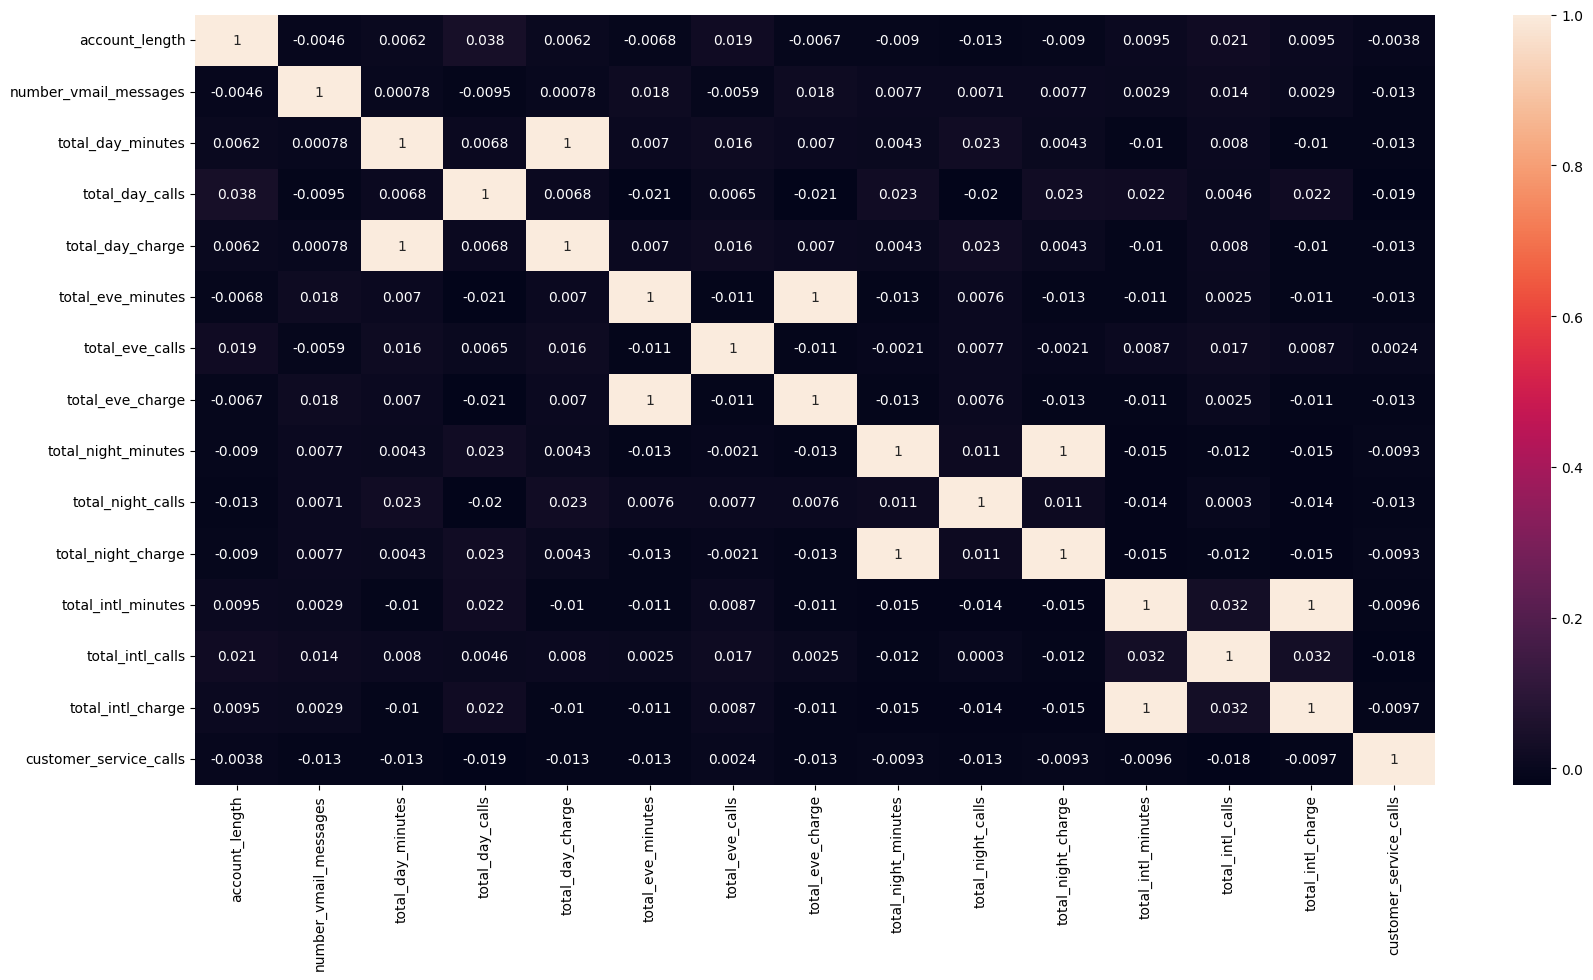

In [35]:
# Corrplot
plt.figure(figsize=(20, 10))

ax = sns.heatmap(numerical_data.corr(), annot=True)

# We remove total_day_charge and keep minutes.

In [112]:
# Data split into true and false churns
churn_true = tel[tel['churn'] == True]
churn_false = tel[tel['churn'] == False]

**Total Day Minutes**

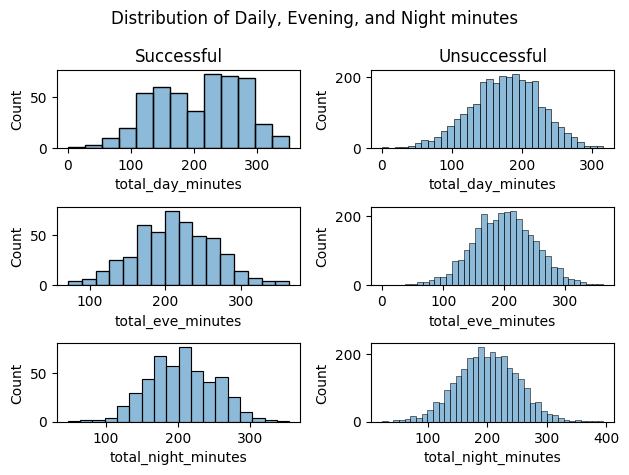

In [136]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.suptitle(t="Distribution of Daily, Evening, and Night minutes")

axes[0, 0].set_title("Successful")
sns.histplot(data=churn_true, x=churn_true['total_day_minutes'],hue=churn_true['churn'], ax=axes[0, 0], legend=False)
sns.histplot(data=churn_true, x=churn_true['total_eve_minutes'], hue=churn_true['churn'], ax=axes[1, 0], legend=False)
sns.histplot(data=churn_true, x=churn_true['total_night_minutes'],hue=churn_true['churn'],ax=axes[2, 0], legend=False)

axes[0, 1].set_title("Unsuccessful")
sns.histplot(data=churn_false, x=churn_false['total_day_minutes'],hue=churn_false['churn'], ax=axes[0, 1], legend=False)
sns.histplot(data=churn_false, x=churn_false['total_eve_minutes'], hue=churn_false['churn'], ax=axes[1, 1], legend=False)
sns.histplot(data=churn_false, x=churn_false['total_night_minutes'],hue=churn_false['churn'],ax=axes[2, 1], legend=False)

fig.tight_layout()
plt.show()


**Total Day Calls**

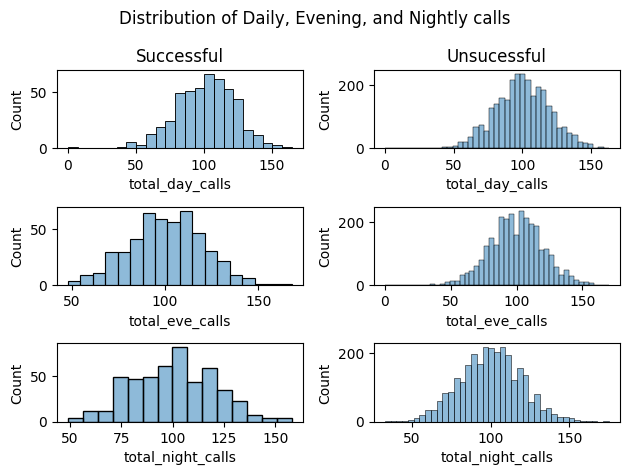

<Figure size 2000x2000 with 0 Axes>

In [135]:
fig, axes = plt.subplots(nrows=3, ncols=2)
plt.suptitle(t="Distribution of Daily, Evening, and Nightly calls")
plt.figure(figsize=(20, 20))

axes[0, 0].set_title('Successful')
sns.histplot(data=churn_true, x=churn_true['total_day_calls'], hue=churn_true['churn'], ax=axes[0, 0], legend=False)
sns.histplot(data=churn_true, x=churn_true['total_eve_calls'], hue=churn_true['churn'],ax=axes[1, 0], legend=False)
sns.histplot(data=churn_true,x=churn_true['total_night_calls'],hue=churn_true['churn'],ax=axes[2, 0], legend=False)
###
axes[0, 1].set_title("Unsucessful")
sns.histplot(data=churn_false, x=churn_false['total_day_calls'],hue=churn_false['churn'],ax=axes[0, 1],legend=False)
sns.histplot(data=churn_false, x=churn_false['total_eve_calls'],hue=churn_false['churn'],ax=axes[1, 1], legend=False)
sns.histplot(data=churn_false, x=churn_false['total_night_calls'],hue=churn_false['churn'],ax=axes[2, 1],legend=False)

fig.tight_layout()
plt.show()

**Total International Minutes**

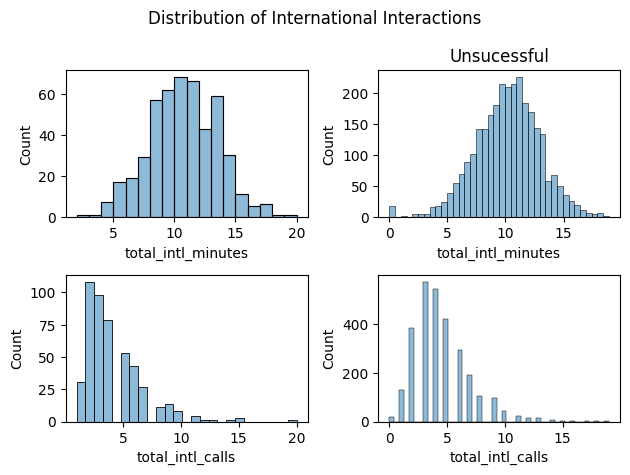

In [134]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.suptitle(t="Distribution of International Interactions")

sns.histplot(data=churn_true, x=churn_true['total_intl_minutes'], hue=churn_true['churn'],ax=axes[0, 0],legend=False, )
sns.histplot(data=churn_true,x=churn_true['total_intl_calls'], hue=churn_true['churn'],ax=axes[1, 0],legend=False)

axes[0, 1].set_title("Unsucessful")
sns.histplot(data=churn_false,x=churn_false['total_intl_minutes'],hue=churn_false['churn'],ax=axes[0, 1],legend=False)
sns.histplot(data=churn_false,x=churn_false['total_intl_calls'],hue=churn_false['churn'],ax=axes[1, 1],legend=False)

fig.tight_layout()
plt.show()

**Customer Service Calls**

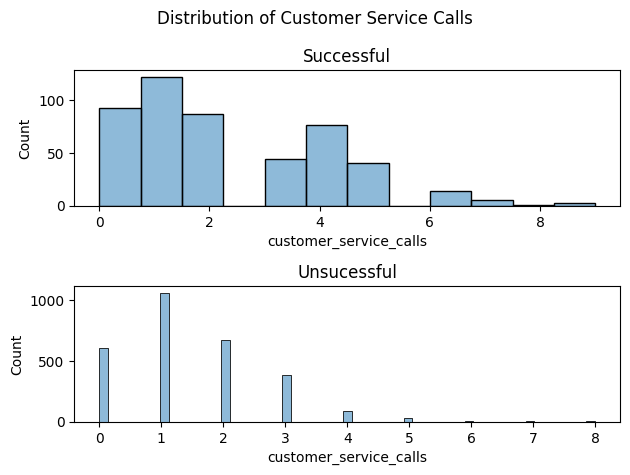

In [133]:
fig, axes = plt.subplots(nrows=2, ncols=1)
plt.suptitle(t="Distribution of Customer Service Calls")

axes[0].set_title("Successful")
sns.histplot(data=churn_true,x=churn_true['customer_service_calls'],hue=churn_true['churn'],ax=axes[0],legend=False)

axes[1].set_title("Unsucessful")
sns.histplot(data=churn_true,x=churn_false['customer_service_calls'],hue=churn_false['churn'],ax=axes[1],legend=False)

fig.tight_layout()
plt.show()

## Categorical Variables

In [200]:
categorical_data = tel[categorical_predictors]
print("Shape of categorical data: {}".format(categorical_data.shape))

Shape of categorical data: (3333, 4)


In [201]:
print(categorical_data)

     state  area_code international_plan voice_mail_plan
0       KS        415                  0             Yes
1       OH        415                  0             Yes
2       NJ        415                  0              No
3       OH        408                  1              No
4       OK        415                  1              No
...    ...        ...                ...             ...
3328    AZ        415                  0             Yes
3329    WV        415                  0              No
3330    RI        510                  0              No
3331    CT        510                  1              No
3332    TN        415                  0             Yes

[3333 rows x 4 columns]


**International and Voice Mail Plans**

In [ ]:

print("Sum of Customers with a Voice Mail Plan: {}".format(sum(categorical_data['voice_mail_plan'] == "Yes")))
print("Sum of Customers without a Voice Mail Plan: {}".format(sum(categorical_data['voice_mail_plan'] == "No")))

print("\nSum of Customers with an International Plan: {}".format(sum(categorical_data['international_plan'] == "Yes")))
print("Sum of Customer without an International Plan: {}".format(sum(categorical_data['international_plan'] == "No")))


Sum of Customers with a Voice Mail Plan: 922
Sum of Customers without a Voice Mail Plan: 2411

Sum of Customers with an International Plan: 323
Sum of Customer without an International Plan: 3010


In [ ]:
# Use: This function performs binary encoding for telechurn dataset  
# Input: String 
# Output: Binary

def bin(variable):
    for i in range(len(variable)):
        
        if(variable[i] == "Yes"):
            variable[i] = 1
        else: 
            variable[i] = 0
    
    return variable

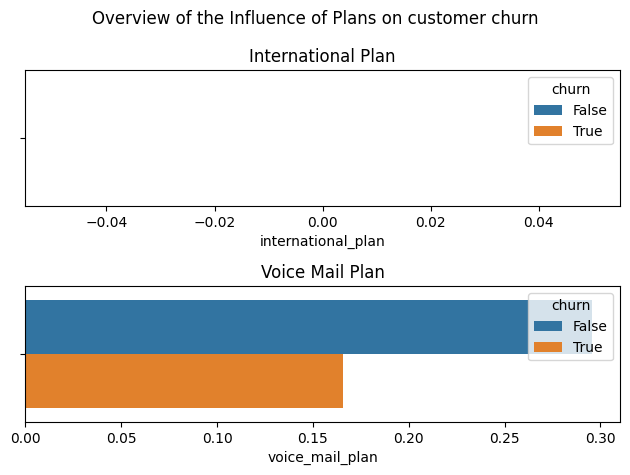

In [204]:
fig, axes = plt.subplots(nrows=2, ncols=1)
plt.suptitle("Overview of the Influence of Plans on customer churn")

axes[0].set_title("International Plan")
sns.barplot(data=tel, x=tel['international_plan'], hue=tel['churn'], ax=axes[0], errorbar=None)

axes[1].set_title("Voice Mail Plan")
sns.barplot(data=tel,x=tel['voice_mail_plan'],hue=tel['churn'],ax=axes[1], errorbar=None)


fig.tight_layout()
plt.show()